In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
! pip install kaggle --upgrade
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d siddharthmandgi/tripadvisor-restaurant-recommendation-data-usa
! unzip tripadvisor-restaurant-recommendation-data-usa.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/456k [00:00<?, ?B/s]
100% 456k/456k [00:00<00:00, 95.0MB/s]
Archive:  tripadvisor-restaurant-recommendation-data-usa.zip
  inflating: TripAdvisor_RestauarantRecommendation.csv  


In [ ]:
df.name.unique()

In [ ]:
df = pd.read_csv("TripAdvisor_RestauarantRecommendation.csv")
df.head(10)

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Contact Number,Trip_advisor Url,Menu,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,+1 415-757-0569,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337","Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",+1 201-488-4999,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,+1 845-849-2839,https://www.tripadvisor.com//Restaurant_Review...,http://tabletalkdiner.com/menu/breakfast/,$$ - $$$
3,Sixty Vines,3701 Dallas Pkwy,"Plano, TX 75093-7777","American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,+1 469-620-8463,https://www.tripadvisor.com//Restaurant_Review...,https://sixtyvines.com/menu/plano-tx/,$$ - $$$
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,+1 315-458-1662,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
5,E Tutto Qua,270 Columbus Ave,"San Francisco, CA 94133-4518","Seafood, Italian, Pizza",4.5 of 5 bubbles,"1,406 reviews",NaN,+1 415-989-1002,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
6,Black Angus Steakhouse - Federal Way,2400 S 320th St,"Federal Way, WA 98003-5465","American, Steakhouse, Bar",4 of 5 bubbles,220 reviews,This is an easy any time place to have dinner!...,+1 253-839-8370,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
7,Ziziki's,11663 Preston Rd,"Dallas, TX 75230-2704","Mediterranean, Greek, Healthy",4.5 of 5 bubbles,89 reviews,My husband and I went to Greece last fall and ...,+1 469-232-9922,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
8,Vince's Italian Restaurant & Pizzeria,2815 NE Sunset Blvd,"Renton, WA 98056-3105","Italian, Pizza, Vegetarian Friendly",4 of 5 bubbles,90 reviews,I love Vince's pizza and I was in the neighbor...,+1 425-226-8180,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
9,John Thomas Steakhouse,1152 Danby Rd,"Ithaca, NY 14850-8927","American, Steakhouse, Gluten Free Options",4 of 5 bubbles,258 reviews,"The ambience, food and service were all excell...",+1 607-273-3464,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$$$


In [ ]:
df.columns

Index(['Name', 'Street Address', 'Location', 'Type', 'Reviews',
       'No of Reviews', 'Comments', 'Contact Number', 'Trip_advisor Url',
       'Menu', 'Price_Range'],
      dtype='object')

In [ ]:
### Contact number, menu url and trip advisor url is useless
df = df.drop(['Contact Number', 'Trip_advisor Url',
       'Menu'],axis=1)

In [ ]:
### Total number of missing Values per columns
df.isnull().sum()

Name                0
Street Address      0
Location            0
Type               13
Reviews             0
No of Reviews       0
Comments          615
Price_Range         0
dtype: int64

Comments and Type have visible missing values. Lets check for other subtle such values

In [ ]:
### Check reviews and No of reviews
print(df.Reviews.unique())
display(df[df.Reviews=='No review'])
df = df.drop([1744,2866])
df = df.reset_index(drop=True)

['4.5 of 5 bubbles' '4 of 5 bubbles' '5 of 5 bubbles' '3.5 of 5 bubbles'
 '3 of 5 bubbles' 'No review']


,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Price_Range
1744,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified
2866,Wavershak's Deli,1800 Route 9,"Toms River, NJ 08755-1284",NaN,No review,Undefined Number,No Comments,Not Specified


We can get rid of these two rows safely since we have no other information

In [ ]:
### Impute NAN's with empty strings
df.Comments = df.Comments.fillna('')

In [ ]:
### Impute Type with Mode
df.Type = df.Type.fillna(df.Type.value_counts().index[0])

In [ ]:
df.isnull().sum()

Name              0
Street Address    0
Location          0
Type              0
Reviews           0
No of Reviews     0
Comments          0
Price_Range       0
dtype: int64

# EDA

## A. 10 Most Common Types of Cuisines 

In [ ]:
### Creating a list of all possible cuisines per restaurants (Multiple instances to later see popularity)
types = []
for i in range(len(df)):
    if type(df.Type[i]) == str:
        types.append(df.Type[i].split(",")) 
flat_list = list(itertools.chain(*types))
series = pd.Series(flat_list)

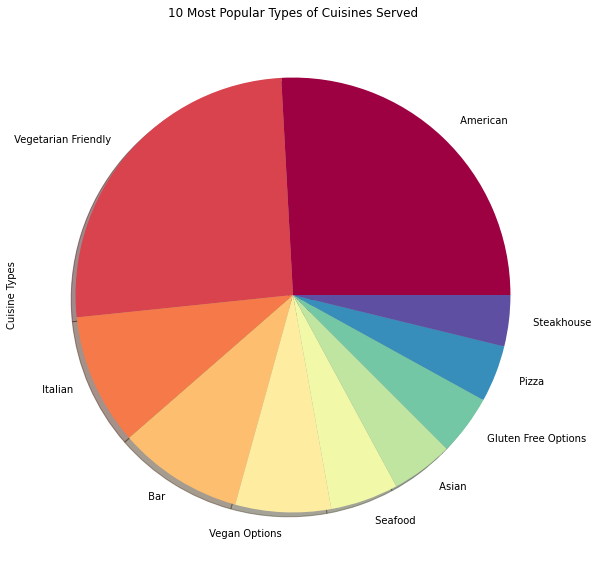

In [ ]:
### Pandas Plot
ax = pd.Series(series).value_counts()[:10].plot(kind='pie', shadow=True,  cmap=plt.get_cmap('Spectral'), figsize=(10,10))
ax.set_ylabel('Cuisine Types')
plot = ax.set_title("10 Most Popular Types of Cuisines Served")

In [ ]:
### Creating a Dataframe for see the number of resaturants serving these cuisines
pd.DataFrame({'No of Restuarants Serving':series.value_counts()}).head(10)

,No of Restuarants Serving
American,1558
Vegetarian Friendly,1553
Italian,588
Bar,561
Vegan Options,428
Seafood,305
Asian,278
Gluten Free Options,270
Pizza,254
Steakhouse,229


Hence Most Restaurants offer Cuisines which are **American** and **Vegetrain Friendly** serving in approx. 1500 restaurants followed by **Italian** and so on.

## B. Which state has the Most Number of Restaurants?

In [ ]:
### Seperating State, City and Zip Code from Location Column
df['State'] = [i.split(",")[-1].split(" ")[1] for i in df.Location]
df['ZipCode'] = [i.split(",")[-1].split(" ")[-1] for i in df.Location]
df['City'] = [",".join(i.split(",")[:-1]) for i in df.Location]
df = df.drop(['Location'],axis=1)
df

,Name,Street Address,Type,Reviews,No of Reviews,Comments,Price_Range,State,ZipCode,City
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,,$$ - $$$,CA,94133-3908,San Francisco
1,Coach House Diner,55 State Rt 4,"Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",$$ - $$$,NJ,07601-6337,Hackensack
2,Table Talk Diner,2521 South Rd Ste C,"American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,$$ - $$$,NY,12601-5476,Poughkeepsie
3,Sixty Vines,3701 Dallas Pkwy,"American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,$$ - $$$,TX,75093-7777,Plano
4,The Clam Bar,3914 Brewerton Rd,"American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,$$ - $$$,NY,13212,Syracuse
...,...,...,...,...,...,...,...,...,...,...
3055,Indigo Kitchen & Ale House,2902 164th St SW,"American, Bar, Vegetarian Friendly",4.5 of 5 bubbles,198 reviews,We had to wait a few minutes to get it but it ...,$$ - $$$,WA,98087-3201,Lynnwood
3056,City Vineyard,233 West Street,"American, Bar, Seafood",4.5 of 5 bubbles,374 reviews,"Came here to see Andrea Gibson perform, we wer...",$$ - $$$,NY,10013,New York City
3057,BRIO Tuscan Grille,3710 US Highway 9,"Steakhouse, Italian, Bar",4 of 5 bubbles,211 reviews,We come to Brio once a month. They are good fo...,$$ - $$$,NJ,07728-4801,Freehold
3058,Maywood Pancake house,92 W Pleasant Ave,"American, Vegan Options, Gluten Free Options",4 of 5 bubbles,87 reviews,Stopped in yesterday for Breakfast. When in Je...,$$ - $$$,NJ,07607-1336,Maywood


In [ ]:
df = df.drop(df[df.State==''].index[0])
df.State.value_counts()

NY    650
CA    615
TX    614
WA    606
NJ    563
PA      9
OR      2
Name: State, dtype: int64

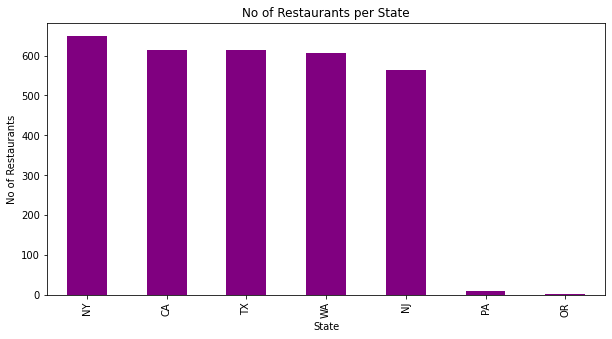

In [ ]:
ax = df.State.value_counts().plot(kind="bar", color="Purple",  figsize=(10,5))

ax.set_ylabel('No of Restaurants')
ax.set_xlabel('State')
plot = ax.set_title("No of Restaurants per State")

In [ ]:
pd.DataFrame({'No of Restuarants per State':df.State.value_counts()}).head(10)

,No of Restuarants per State
NY,650
CA,615
TX,614
WA,606
NJ,563
PA,9
OR,2


Most Number of Restaurants are in **New York** followed by **California**

## C.  Ranking the best (most highly rated) restaurants from each state

#### Now most highly rated restaurant has to include two factors: -
- Number of people who reviewed
- Review Ratings on 5



In [ ]:
### Converting the string values to float/int values
df['Reviews'] = [float(i.split(" ")[0]) for i in df.Reviews]
df['No of Reviews'] = [int(i.split(" ")[0].replace(",","")) for i in df['No of Reviews']]

In [ ]:
### Weighted Ratings - No of Reviewers * Average Ratings
df['weighted_ratings'] = df.Reviews*df['No of Reviews']

In [ ]:
df.weighted_ratings

0       1093.5
1        336.0
2       1024.0
3       1057.5
4       1140.0
         ...  
3055     891.0
3056    1683.0
3057     844.0
3058     348.0
3059     823.5
Name: weighted_ratings, Length: 3059, dtype: float64

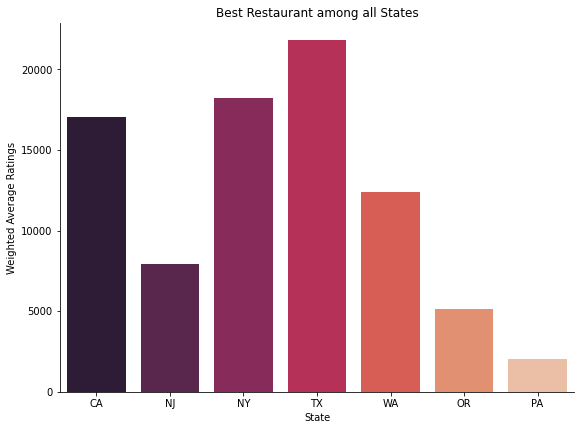

In [ ]:
labels = df.State.unique().flatten()
average_vote_share_list = [df[df.State==i].weighted_ratings.max() for i in labels]
avg_wt_ratings = pd.DataFrame({'State':labels, 'Weighted Average Ratings': average_vote_share_list})
plot = sns.catplot(x='State', y="Weighted Average Ratings", kind="bar", data=avg_wt_ratings, palette="rocket")
plt.title("Best Restaurant among all States")
plt.gcf().set_size_inches(9, 6)

In [ ]:
df[df.weighted_ratings==df.weighted_ratings.max()]

,Name,Street Address,Type,Reviews,No of Reviews,Comments,Price_Range,State,ZipCode,City,weighted_ratings
2164,Big Texan Steak Ranch,7701 E Interstate 40,"American, Steakhouse, Southwestern",4.0,5448,Roquefort dressing homemade and delicious. I h...,$$ - $$$,TX,79118-6915,Amarillo,21792.0


Now **Texas's** Big Texan Steak Ranch is the best among all states. Lets figure out the reason. As we have discussed before no of reviewers play an important role in the restaurants success along side the ratings.

In [ ]:
df[df['No of Reviews'] == df['No of Reviews'].max()]

,Name,Street Address,Type,Reviews,No of Reviews,Comments,Price_Range,State,ZipCode,City,weighted_ratings
2164,Big Texan Steak Ranch,7701 E Interstate 40,"American, Steakhouse, Southwestern",4.0,5448,Roquefort dressing homemade and delicious. I h...,$$ - $$$,TX,79118-6915,Amarillo,21792.0


Big Texan Steak Ranch does have the **most no of people** who have rated giving it a good average rating of about 4.0. This results in it being the best restaurant in all the above states

## D.  Best State for Food?
(Based on Weighted Ratings)

- Weighted Ratings - No of Reviewers * Average Ratings.
- Meaning 500 people giving an average rating of 4.0 is much more influential than 200 people giving an average rating of 4.5 
- Another Factor that would influence would be the number of restaurants. Each Restaurant will have its own set of reviewers and ratings.

- Hence to get a good overall picture adding all the weighted ratings by the state and comparing them is still a better picture 

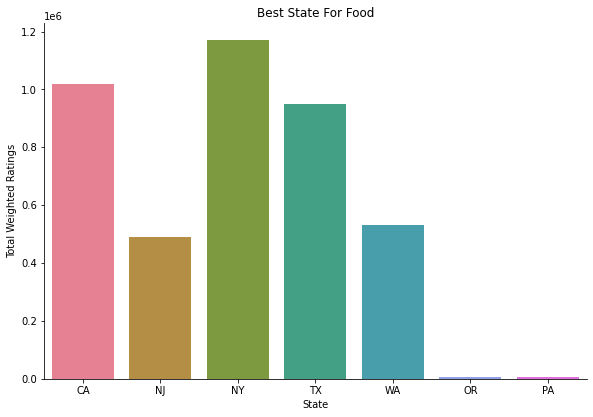

In [ ]:
labels = df.State.unique().flatten()
total_vote_share_list = [df[df.State==i].weighted_ratings.sum() for i in labels]
total_wt_ratings = pd.DataFrame({'State':labels, 'Total Weighted Ratings': total_vote_share_list})
plot = sns.catplot(x='State', y="Total Weighted Ratings", kind="bar", data=total_wt_ratings, palette="husl")
plt.title("Best State For Food")
plt.gcf().set_size_inches(9, 6)

Hence taking into account the weighted ratings and the number of restaurants we get **New York** as the best overall state for food followed by **California** and **Texas**.

## E. Best City for Food?

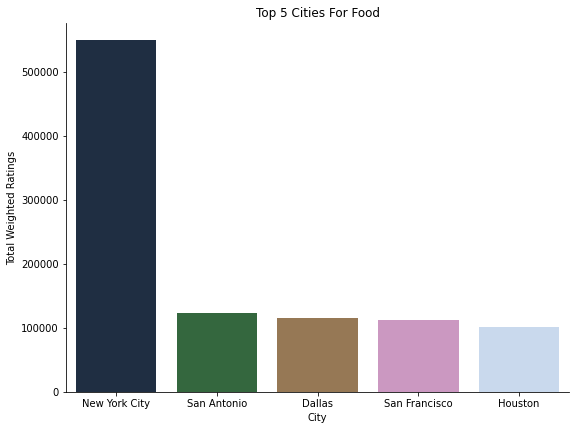

In [ ]:
labels = df.City.unique().flatten()
total_vote_share_list = [df[df.City==i].weighted_ratings.sum() for i in labels]
total_wt_ratings = pd.DataFrame({'City':labels, 'Total Weighted Ratings': total_vote_share_list})
total_wt_ratings = total_wt_ratings.sort_values(by=['Total Weighted Ratings'],ascending=False).head(5)
plot = sns.catplot(x='City', y="Total Weighted Ratings", kind="bar", data=total_wt_ratings, palette="cubehelix")
plt.title("Top 5 Cities For Food")
plt.gcf().set_size_inches(9, 6)

New York City is by Far the best city for food based on the weighted Ratings

In [ ]:
#### Our Main Feature - Comments
df.Comments

0                                                        
1       Both times we were there very late, after 11 P...
2       Waitress was very friendly but a little pricey...
3       Not sure why I went there for the second time....
4       Doesn't look like much from the outside but wa...
                              ...                        
3055    We had to wait a few minutes to get it but it ...
3056    Came here to see Andrea Gibson perform, we wer...
3057    We come to Brio once a month. They are good fo...
3058    Stopped in yesterday for Breakfast. When in Je...
3059    First time for dinner. 2 couples. Delicious mu...
Name: Comments, Length: 3059, dtype: object

In [ ]:
### Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

### Construct the required tf-idf matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df.Comments)

### Output Shape of tf-idf matrix
tfidf_matrix.shape

(3059, 6241)

In [ ]:
df

,Name,Street Address,Type,Reviews,No of Reviews,Comments,Price_Range,State,ZipCode,City,weighted_ratings
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"Seafood, Vegetarian Friendly, Vegan Options",4.5,243,,$$ - $$$,CA,94133-3908,San Francisco,1093.5
1,Coach House Diner,55 State Rt 4,"Diner, American, Vegetarian Friendly",4.0,84,"Both times we were there very late, after 11 P...",$$ - $$$,NJ,07601-6337,Hackensack,336.0
2,Table Talk Diner,2521 South Rd Ste C,"American, Diner, Vegetarian Friendly",4.0,256,Waitress was very friendly but a little pricey...,$$ - $$$,NY,12601-5476,Poughkeepsie,1024.0
3,Sixty Vines,3701 Dallas Pkwy,"American, Wine Bar, Vegetarian Friendly",4.5,235,Not sure why I went there for the second time....,$$ - $$$,TX,75093-7777,Plano,1057.5
4,The Clam Bar,3914 Brewerton Rd,"American, Bar, Seafood",4.0,285,Doesn't look like much from the outside but wa...,$$ - $$$,NY,13212,Syracuse,1140.0
...,...,...,...,...,...,...,...,...,...,...,...
3055,Indigo Kitchen & Ale House,2902 164th St SW,"American, Bar, Vegetarian Friendly",4.5,198,We had to wait a few minutes to get it but it ...,$$ - $$$,WA,98087-3201,Lynnwood,891.0
3056,City Vineyard,233 West Street,"American, Bar, Seafood",4.5,374,"Came here to see Andrea Gibson perform, we wer...",$$ - $$$,NY,10013,New York City,1683.0
3057,BRIO Tuscan Grille,3710 US Highway 9,"Steakhouse, Italian, Bar",4.0,211,We come to Brio once a month. They are good fo...,$$ - $$$,NJ,07728-4801,Freehold,844.0
3058,Maywood Pancake house,92 W Pleasant Ave,"American, Vegan Options, Gluten Free Options",4.0,87,Stopped in yesterday for Breakfast. When in Je...,$$ - $$$,NJ,07607-1336,Maywood,348.0


In [ ]:
#### Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
### Construct a reverse map of indices and restaurant names
indices1 = pd.Series(df.index, index=df.Name).drop_duplicates()
indices1

Name
Betty Lou's Seafood and Grill       0
Coach House Diner                   1
Table Talk Diner                    2
Sixty Vines                         3
The Clam Bar                        4
                                 ... 
Indigo Kitchen & Ale House       3055
City Vineyard                    3056
BRIO Tuscan Grille               3057
Maywood Pancake house            3058
Porto Leggero                    3059
Length: 3059, dtype: int64

In [ ]:
### Function that gives us the most similar restaurants
def get_recommendations(name, cosine_sim=cosine_sim):
    
    ### Index of the restaurant which matches the name
    idx = indices[name]
    
    ### Get the pairwise similarity
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    ### Sort the restaurants based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    
    ### Get the similarity scores of the 10 Most similar restuarants
    sim_scores = sim_scores[1:11]
    
    ### Get the restauarant inidices
    restaurant_indices = [i[0] for i in sim_scores]
    
    ### Resturn the Top 10 most similar restaurants
    return df['Name'].iloc[restaurant_indices]

In [ ]:
get_recommendations('Coach House Diner')

281                          Bean's & Lager
1917                Pappas Bros. Steakhouse
1186                              Bistro 18
2340              The Blue fish Las Colinas
998                   The Fork at Agate Bay
1896                  Mediterranean Kitchen
2736    Kitchen Table Cafe- Evergreen Place
2351                           Square Lotus
2276                      Dark Horse Tavern
597                              Noah's Ark
Name: Name, dtype: object

These are 10 Most Similar Restaurants based on Comments

In [ ]:
import pickle

pickle.dump(indices1, open("indices.sav", 'wb'))

pickle.dump(cosine_sim, open("cosine_sim.sav", 'wb'))

In [ ]:
indices = pickle.load(open("indices.sav", 'rb'))

In [ ]:
df.to_csv('out.csv', index=False)

In [ ]:
df = pd.read_csv("out.csv")
df

,Name,Street Address,Type,Reviews,No of Reviews,Comments,Price_Range,State,ZipCode,City,weighted_ratings
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"Seafood, Vegetarian Friendly, Vegan Options",4.5,243,NaN,$$ - $$$,CA,94133-3908,San Francisco,1093.5
1,Coach House Diner,55 State Rt 4,"Diner, American, Vegetarian Friendly",4.0,84,"Both times we were there very late, after 11 P...",$$ - $$$,NJ,07601-6337,Hackensack,336.0
2,Table Talk Diner,2521 South Rd Ste C,"American, Diner, Vegetarian Friendly",4.0,256,Waitress was very friendly but a little pricey...,$$ - $$$,NY,12601-5476,Poughkeepsie,1024.0
3,Sixty Vines,3701 Dallas Pkwy,"American, Wine Bar, Vegetarian Friendly",4.5,235,Not sure why I went there for the second time....,$$ - $$$,TX,75093-7777,Plano,1057.5
4,The Clam Bar,3914 Brewerton Rd,"American, Bar, Seafood",4.0,285,Doesn't look like much from the outside but wa...,$$ - $$$,NY,13212,Syracuse,1140.0
...,...,...,...,...,...,...,...,...,...,...,...
3054,Indigo Kitchen & Ale House,2902 164th St SW,"American, Bar, Vegetarian Friendly",4.5,198,We had to wait a few minutes to get it but it ...,$$ - $$$,WA,98087-3201,Lynnwood,891.0
3055,City Vineyard,233 West Street,"American, Bar, Seafood",4.5,374,"Came here to see Andrea Gibson perform, we wer...",$$ - $$$,NY,10013,New York City,1683.0
3056,BRIO Tuscan Grille,3710 US Highway 9,"Steakhouse, Italian, Bar",4.0,211,We come to Brio once a month. They are good fo...,$$ - $$$,NJ,07728-4801,Freehold,844.0
3057,Maywood Pancake house,92 W Pleasant Ave,"American, Vegan Options, Gluten Free Options",4.0,87,Stopped in yesterday for Breakfast. When in Je...,$$ - $$$,NJ,07607-1336,Maywood,348.0
